
TOPIC: SMART PARCEL DELIVERY SYSTEM

In [ ]:
import numpy as np

# Define the filename
filename = 'distances_sample_20.txt'

# Try loading the distance matrix from the file, with error handling
try:
    distance_matrix = np.loadtxt(filename, dtype=int)
    print("File loaded successfully")
except FileNotFoundError:
    print(f"Error: The file '{filename}' was not found.")
    # You can also specify the correct file path here or ask the user to upload the file
except Exception as e:
    print(f"An error occurred: {e}")

# If file is loaded successfully, continue with further processing
if 'distance_matrix' in locals():
    n = len(distance_matrix)  # Number of cities

    # Example: Print the distance matrix and number of cities
    print("Distance Matrix:")
    print(distance_matrix)
    print(f"Number of cities: {n}")


File loaded successfully
Distance Matrix:
[[ 0 54 42 44 19 14 31 18 76 93 22 51 73 40 30 18 76 66 34 49]
 [67  0 55 67 94 98 30 63 33 76 50 72 60 53 60 93 77 23 38 66]
 [84 96  0 34 29 62 35 77 75 18 50 29 11 24 50 26 96 26 52 74]
 [59 58 68  0 29 65 98 83 95 34 13 76 45 60 94 96 72 88 15 31]
 [39 40 16 97  0 55 28 25 23 54 98 60 90 14 67 84 19 33 76 59]
 [58 79 94 68 15  0 29 85 19 31 53 28 52 82 52 73 15 17 85 69]
 [64 42 74 43 15 19  0 22 91 63 53 74 88 78 68 83 17 58 61 10]
 [40 39 35 89 76 20 16  0 55 28 50 84 98 80 54 63 19 88 40 78]
 [72 86 57 84 96 89 97 78  0 47 59 12 14 71 15 95 94 99 21 69]
 [77 65 28 15 15 41 16 86 49  0 30 47 39 27 68 30 54 96 94 75]
 [49 62 15 49 83 67 30 89 27 52  0 42 43 28 47 66 95 80 10 32]
 [73 23 52 23 48 44 32 14 41 17 21  0 56 33 80 67 88 30 54 81]
 [26 99 54 48 57 26 18 91 47 55 15 29  0 54 39 78 59 33 42 19]
 [65 14 21 64 19 85 63 23 36 87 51 86 95  0 12 19 18 56 66 76]
 [23 36 98 69 34 42 69 97 17 45 75 95 83 29  0 17 47 54 35 79]
 [27 67 23 59

IMPLEMENTION OF ALOGROTHIMS

In [ ]:
import numpy as np
import itertools
import random
import math

# --------------------
# Load Distance Matrix
# --------------------
matrix = np.array([
    [0,54,42,44,19,14,31,18,76,93,22,51,73,40,30,18,76,66,34,49],
    [67,0,55,67,94,98,30,63,33,76,50,72,60,53,60,93,77,23,38,66],
    [84,96,0,34,29,62,35,77,75,18,50,29,11,24,50,26,96,26,52,74],
    [59,58,68,0,29,65,98,83,95,34,13,76,45,60,94,96,72,88,15,31],
    [39,40,16,97,0,55,28,25,23,54,98,60,90,14,67,84,19,33,76,59],
    [58,79,94,68,15,0,29,85,19,31,53,28,52,82,52,73,15,17,85,69],
    [64,42,74,43,15,19,0,22,91,63,53,74,88,78,68,83,17,58,61,10],
    [40,39,35,89,76,20,16,0,55,28,50,84,98,80,54,63,19,88,40,78],
    [72,86,57,84,96,89,97,78,0,47,59,12,14,71,15,95,94,99,21,69],
    [77,65,28,15,15,41,16,86,49,0,30,47,39,27,68,30,54,96,94,75],
    [49,62,15,49,83,67,30,89,27,52,0,42,43,28,47,66,95,80,10,32],
    [73,23,52,23,48,44,32,14,41,17,21,0,56,33,80,67,88,30,54,81],
    [26,99,54,48,57,26,18,91,47,55,15,29,0,54,39,78,59,33,42,19],
    [65,14,21,64,19,85,63,23,36,87,51,86,95,0,12,19,18,56,66,76],
    [23,36,98,69,34,42,69,97,17,45,75,95,83,29,0,17,47,54,35,79],
    [27,67,23,59,37,93,54,40,88,69,86,68,47,33,95,0,53,91,73,77],
    [95,82,46,13,13,10,45,92,71,25,76,38,33,81,89,12,0,99,19,75],
    [53,65,63,70,73,83,80,62,72,15,14,91,86,36,11,42,93,0,88,83],
    [42,35,85,80,40,76,85,81,49,68,73,59,97,69,43,94,86,29,0,81],
    [85,15,34,42,71,87,64,29,21,88,47,79,68,56,90,12,23,41,93,0]
])

n = len(matrix)

# ---------------------
# 1. Brute Force Method
# ---------------------
def brute_force(matrix):
    cities = range(n)
    min_cost = float('inf')
    best_path = []
    for perm in itertools.permutations(cities):
        cost = sum(matrix[perm[i]][perm[i+1]] for i in range(n-1)) + matrix[perm[-1]][perm[0]]
        if cost < min_cost:
            min_cost = cost
            best_path = perm
    return min_cost, best_path

# ----------------------
# 2. Nearest Neighbor
# ----------------------
def nearest_neighbor(matrix, start=0):
    unvisited = set(range(n))
    tour = [start]
    unvisited.remove(start)
    cost = 0
    while unvisited:
        last = tour[-1]
        next_city = min(unvisited, key=lambda city: matrix[last][city])
        tour.append(next_city)
        cost += matrix[last][next_city]
        unvisited.remove(next_city)
    cost += matrix[tour[-1]][tour[0]]
    return cost, tour

# -----------------------------
# 3. MST Approximation (Prim's)
# -----------------------------
def mst_approximation(matrix):
    visited = [False] * n
    visited[0] = True
    edges = []
    total = 0

    while not all(visited):
        min_edge = (None, None, float('inf'))
        for u in range(n):
            if visited[u]:
                for v in range(n):
                    if not visited[v] and 0 < matrix[u][v] < min_edge[2]:
                        min_edge = (u, v, matrix[u][v])
        u, v, w = min_edge
        visited[v] = True
        edges.append((u, v))
        total += w

    return total, edges

# ----------------------------
# 4. Dynamic Programming (Held-Karp)
# ----------------------------
def held_karp(matrix):
    C = {}

    for k in range(1, n):
        C[(1 << k, k)] = (matrix[0][k], [0, k])

    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for k in subset:
                prev_bits = bits & ~(1 << k)
                res = []
                for m in subset:
                    if m == k:
                        continue
                    res.append((C[(prev_bits, m)][0] + matrix[m][k], C[(prev_bits, m)][1] + [k]))
                C[(bits, k)] = min(res)

    bits = (2**n - 1) - 1
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + matrix[k][0], C[(bits, k)][1]))
    opt, path = min(res)
    return opt, path

# ---------------------
# 5. Genetic Algorithm
# ---------------------
def genetic_algorithm(matrix, pop_size=100, generations=500):
    def create_individual():
        ind = list(range(n))
        random.shuffle(ind)
        return ind

    def fitness(ind):
        return sum(matrix[ind[i]][ind[(i+1)%n]] for i in range(n))

    def crossover(p1, p2):
        a, b = sorted(random.sample(range(n), 2))
        child_p1 = p1[a:b]
        child_p2 = [item for item in p2 if item not in child_p1]
        return child_p2[:a] + child_p1 + child_p2[a:]

    def mutate(ind):
        a, b = random.sample(range(n), 2)
        ind[a], ind[b] = ind[b], ind[a]

    population = [create_individual() for _ in range(pop_size)]

    for gen in range(generations):
        population = sorted(population, key=fitness)
        next_gen = population[:10]
        for _ in range(pop_size - 10):
            parent1, parent2 = random.sample(population[:50], 2)
            child = crossover(parent1, parent2)
            if random.random() < 0.2:
                mutate(child)
            next_gen.append(child)
        population = next_gen

    best_ind = min(population, key=fitness)
    return fitness(best_ind), best_ind

# ----------------------
# 6. Simulated Annealing
# ----------------------
def simulated_annealing(matrix, T=10000.0, T_min=1.0, alpha=0.995):
    def route_cost(route):
        return sum(matrix[route[i]][route[i+1]] for i in range(n-1)) + matrix[route[-1]][route[0]]

    route = list(range(n))
    current_cost = route_cost(route)
    best_route = list(route)
    best_cost = current_cost

    while T > T_min:
        i, j = random.sample(range(n), 2)
        new_route = list(route)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        new_cost = route_cost(new_route)
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / T):
            route = new_route
            current_cost = new_cost
            if new_cost < best_cost:
                best_cost = new_cost
                best_route = new_route
        T *= alpha

    return best_cost, best_route

# ----------------------
# RUN EVERYTHING
# ----------------------
print("Running algorithms on Smart Delivery System (20 Cities) 🚚...\n")

# Brute Force (⚠️ very slow, comment if needed)
# print("Brute Force:")
# bf_cost, bf_path = brute_force(matrix)
# print(f"Cost: {bf_cost}\nPath: {bf_path}\n")

print("Nearest Neighbor:")
nn_cost, nn_path = nearest_neighbor(matrix)
print(f"Cost: {nn_cost}\nPath: {nn_path}\n")

print("MST Approximation:")
mst_cost, mst_edges = mst_approximation(matrix)
print(f"Cost (MST total weight): {mst_cost}\nEdges: {mst_edges}\n")

print("Held-Karp Dynamic Programming:")
hk_cost, hk_path = held_karp(matrix)
print(f"Cost: {hk_cost}\nPath: {hk_path}\n")

print("Genetic Algorithm:")
ga_cost, ga_path = genetic_algorithm(matrix)
print(f"Cost: {ga_cost}\nPath: {ga_path}\n")

print("Simulated Annealing:")
sa_cost, sa_path = simulated_annealing(matrix)
print(f"Cost: {sa_cost}\nPath: {sa_path}\n")

print("\n✅ All Algorithms Executed.")



Running algorithms on Smart Delivery System (20 Cities) 🚚...

Nearest Neighbor:
Cost: 484
Path: [0, 5, 4, 13, 14, 8, 11, 7, 6, 19, 15, 2, 12, 10, 18, 17, 9, 3, 1, 16]

MST Approximation:
Cost (MST total weight): 259
Edges: [(0, 5), (5, 4), (4, 13), (13, 14), (13, 1), (5, 16), (16, 15), (16, 3), (3, 10), (10, 18), (10, 2), (2, 12), (5, 17), (17, 9), (9, 6), (6, 19), (14, 8), (8, 11), (11, 7)]

Held-Karp Dynamic Programming:
Cost: 320
Path: [0, 5, 16, 3, 10, 18, 1, 17, 9, 4, 13, 14, 8, 11, 7, 6, 19, 15, 2, 12]

Genetic Algorithm:
Cost: 386
Path: [2, 3, 10, 18, 0, 7, 16, 5, 6, 19, 15, 13, 1, 17, 14, 8, 12, 11, 9, 4]

Simulated Annealing:
Cost: 500
Path: [12, 6, 19, 1, 17, 14, 0, 5, 16, 4, 8, 3, 18, 11, 7, 9, 10, 2, 13, 15]


✅ All Algorithms Executed.


ANYALSIS OF ALGROTHIMS

In [ ]:
import numpy as np
import itertools
import random
import math
import time

# --------------------
# Load Distance Matrix
# --------------------
matrix = np.array([
    [0,54,42,44,19,14,31,18,76,93,22,51,73,40,30,18,76,66,34,49],
    [67,0,55,67,94,98,30,63,33,76,50,72,60,53,60,93,77,23,38,66],
    [84,96,0,34,29,62,35,77,75,18,50,29,11,24,50,26,96,26,52,74],
    [59,58,68,0,29,65,98,83,95,34,13,76,45,60,94,96,72,88,15,31],
    [39,40,16,97,0,55,28,25,23,54,98,60,90,14,67,84,19,33,76,59],
    [58,79,94,68,15,0,29,85,19,31,53,28,52,82,52,73,15,17,85,69],
    [64,42,74,43,15,19,0,22,91,63,53,74,88,78,68,83,17,58,61,10],
    [40,39,35,89,76,20,16,0,55,28,50,84,98,80,54,63,19,88,40,78],
    [72,86,57,84,96,89,97,78,0,47,59,12,14,71,15,95,94,99,21,69],
    [77,65,28,15,15,41,16,86,49,0,30,47,39,27,68,30,54,96,94,75],
    [49,62,15,49,83,67,30,89,27,52,0,42,43,28,47,66,95,80,10,32],
    [73,23,52,23,48,44,32,14,41,17,21,0,56,33,80,67,88,30,54,81],
    [26,99,54,48,57,26,18,91,47,55,15,29,0,54,39,78,59,33,42,19],
    [65,14,21,64,19,85,63,23,36,87,51,86,95,0,12,19,18,56,66,76],
    [23,36,98,69,34,42,69,97,17,45,75,95,83,29,0,17,47,54,35,79],
    [27,67,23,59,37,93,54,40,88,69,86,68,47,33,95,0,53,91,73,77],
    [95,82,46,13,13,10,45,92,71,25,76,38,33,81,89,12,0,99,19,75],
    [53,65,63,70,73,83,80,62,72,15,14,91,86,36,11,42,93,0,88,83],
    [42,35,85,80,40,76,85,81,49,68,73,59,97,69,43,94,86,29,0,81],
    [85,15,34,42,71,87,64,29,21,88,47,79,68,56,90,12,23,41,93,0]
])

n = len(matrix)

# ---------------------
# 1. Brute Force Method
# ---------------------
def brute_force(matrix):
    cities = range(n)
    min_cost = float('inf')
    best_path = []
    for perm in itertools.permutations(cities):
        cost = sum(matrix[perm[i]][perm[i+1]] for i in range(n-1)) + matrix[perm[-1]][perm[0]]
        if cost < min_cost:
            min_cost = cost
            best_path = perm
    return min_cost, best_path

# ----------------------
# 2. Nearest Neighbor
# ----------------------
def nearest_neighbor(matrix, start=0):
    unvisited = set(range(n))
    tour = [start]
    unvisited.remove(start)
    cost = 0
    while unvisited:
        last = tour[-1]
        next_city = min(unvisited, key=lambda city: matrix[last][city])
        tour.append(next_city)
        cost += matrix[last][next_city]
        unvisited.remove(next_city)
    cost += matrix[tour[-1]][tour[0]]
    return cost, tour

# -----------------------------
# 3. MST Approximation (Prim's)
# -----------------------------
def mst_approximation(matrix):
    visited = [False] * n
    visited[0] = True
    edges = []
    total = 0

    while not all(visited):
        min_edge = (None, None, float('inf'))
        for u in range(n):
            if visited[u]:
                for v in range(n):
                    if not visited[v] and 0 < matrix[u][v] < min_edge[2]:
                        min_edge = (u, v, matrix[u][v])
        u, v, w = min_edge
        visited[v] = True
        edges.append((u, v))
        total += w

    return total, edges

# ----------------------------
# 4. Dynamic Programming (Held-Karp)
# ----------------------------
def held_karp(matrix):
    C = {}

    for k in range(1, n):
        C[(1 << k, k)] = (matrix[0][k], [0, k])

    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for k in subset:
                prev_bits = bits & ~(1 << k)
                res = []
                for m in subset:
                    if m == k:
                        continue
                    res.append((C[(prev_bits, m)][0] + matrix[m][k], C[(prev_bits, m)][1] + [k]))
                C[(bits, k)] = min(res)

    bits = (2**n - 1) - 1
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + matrix[k][0], C[(bits, k)][1]))
    opt, path = min(res)
    return opt, path

# ----------------------
# 5. Genetic Algorithm
# ----------------------
def genetic_algorithm(matrix, pop_size=100, generations=500):
    def create_individual():
        ind = list(range(n))
        random.shuffle(ind)
        return ind

    def fitness(ind):
        return sum(matrix[ind[i]][ind[(i+1)%n]] for i in range(n))

    def crossover(p1, p2):
        a, b = sorted(random.sample(range(n), 2))
        child_p1 = p1[a:b]
        child_p2 = [item for item in p2 if item not in child_p1]
        return child_p2[:a] + child_p1 + child_p2[a:]

    def mutate(ind):
        a, b = random.sample(range(n), 2)
        ind[a], ind[b] = ind[b], ind[a]

    population = [create_individual() for _ in range(pop_size)]

    for gen in range(generations):
        population = sorted(population, key=fitness)
        next_gen = population[:10]
        for _ in range(pop_size - 10):
            parent1, parent2 = random.sample(population[:50], 2)
            child = crossover(parent1, parent2)
            if random.random() < 0.2:
                mutate(child)
            next_gen.append(child)
        population = next_gen

    best_ind = min(population, key=fitness)
    return fitness(best_ind), best_ind

# ----------------------
# 6. Simulated Annealing
# ----------------------
def simulated_annealing(matrix, T=10000.0, T_min=1.0, alpha=0.995):
    def route_cost(route):
        return sum(matrix[route[i]][route[i+1]] for i in range(n-1)) + matrix[route[-1]][route[0]]

    route = list(range(n))
    current_cost = route_cost(route)
    best_route = list(route)
    best_cost = current_cost

    while T > T_min:
        i, j = random.sample(range(n), 2)
        new_route = list(route)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        new_cost = route_cost(new_route)
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / T):
            route = new_route
            current_cost = new_cost
            if new_cost < best_cost:
                best_cost = new_cost
                best_route = new_route
        T *= alpha

    return best_cost, best_route

# ----------------------
# ANALYSIS CODE
# ----------------------
def analyze_algorithm(func, matrix, label="Algorithm"):
    start_time = time.time()
    cost, path = func(matrix)
    end_time = time.time()
    exec_time = end_time - start_time
    print(f"{label}:")
    print(f"Execution Time: {exec_time:.4f} seconds")
    print(f"Cost: {cost}")
    print(f"Path: {path}\n")

# ----------------------
# RUN EVERYTHING AND ANALYZE
# ----------------------
print("Running algorithms and analyzing the Smart Delivery System (20 Cities)...\n")

# Brute Force (⚠️ very slow, comment if needed)
# analyze_algorithm(brute_force, matrix, "Brute Force")

analyze_algorithm(nearest_neighbor, matrix, "Nearest Neighbor")
analyze_algorithm(mst_approximation, matrix, "MST Approximation")
analyze_algorithm(held_karp, matrix, "Held-Karp Dynamic Programming")
analyze_algorithm(genetic_algorithm, matrix, "Genetic Algorithm")
analyze_algorithm(simulated_annealing, matrix, "Simulated Annealing")


Running algorithms and analyzing the Smart Delivery System (20 Cities)...

Nearest Neighbor:
Execution Time: 0.0001 seconds
Cost: 484
Path: [0, 5, 4, 13, 14, 8, 11, 7, 6, 19, 15, 2, 12, 10, 18, 17, 9, 3, 1, 16]

MST Approximation:
Execution Time: 0.0008 seconds
Cost: 259
Path: [(0, 5), (5, 4), (4, 13), (13, 14), (13, 1), (5, 16), (16, 15), (16, 3), (3, 10), (10, 18), (10, 2), (2, 12), (5, 17), (17, 9), (9, 6), (6, 19), (14, 8), (8, 11), (11, 7)]

Held-Karp Dynamic Programming:
Execution Time: 77.8123 seconds
Cost: 320
Path: [0, 5, 16, 3, 10, 18, 1, 17, 9, 4, 13, 14, 8, 11, 7, 6, 19, 15, 2, 12]

Genetic Algorithm:
Execution Time: 0.7844 seconds
Cost: 423
Path: [3, 10, 2, 12, 5, 4, 7, 9, 13, 16, 15, 0, 18, 17, 14, 1, 6, 19, 8, 11]

Simulated Annealing:
Execution Time: 0.0236 seconds
Cost: 491
Path: [10, 18, 14, 4, 8, 19, 1, 6, 5, 17, 13, 16, 15, 0, 7, 2, 12, 11, 9, 3]



COMPARSION OF ALOGROTHIMS

In [ ]:
import itertools
import time
import sys

# Full distance matrix
distances = [
    [0,54,42,44,19,14,31,18,76,93,22,51,73,40,30,18,76,66,34,49],
    [67,0,55,67,94,98,30,63,33,76,50,72,60,53,60,93,77,23,38,66],
    [84,96,0,34,29,62,35,77,75,18,50,29,11,24,50,26,96,26,52,74],
    [59,58,68,0,29,65,98,83,95,34,13,76,45,60,94,96,72,88,15,31],
    [39,40,16,97,0,55,28,25,23,54,98,60,90,14,67,84,19,33,76,59],
    [58,79,94,68,15,0,29,85,19,31,53,28,52,82,52,73,15,17,85,69],
    [64,42,74,43,15,19,0,22,91,63,53,74,88,78,68,83,17,58,61,10],
    [40,39,35,89,76,20,16,0,55,28,50,84,98,80,54,63,19,88,40,78],
    [72,86,57,84,96,89,97,78,0,47,59,12,14,71,15,95,94,99,21,69],
    [77,65,28,15,15,41,16,86,49,0,30,47,39,27,68,30,54,96,94,75],
    [49,62,15,49,83,67,30,89,27,52,0,42,43,28,47,66,95,80,10,32],
    [73,23,52,23,48,44,32,14,41,17,21,0,56,33,80,67,88,30,54,81],
    [26,99,54,48,57,26,18,91,47,55,15,29,0,54,39,78,59,33,42,19],
    [65,14,21,64,19,85,63,23,36,87,51,86,95,0,12,19,18,56,66,76],
    [23,36,98,69,34,42,69,97,17,45,75,95,83,29,0,17,47,54,35,79],
    [27,67,23,59,37,93,54,40,88,69,86,68,47,33,95,0,53,91,73,77],
    [95,82,46,13,13,10,45,92,71,25,76,38,33,81,89,12,0,99,19,75],
    [53,65,63,70,73,83,80,62,72,15,14,91,86,36,11,42,93,0,88,83],
    [42,35,85,80,40,76,85,81,49,68,73,59,97,69,43,94,86,29,0,81],
    [85,15,34,42,71,87,64,29,21,88,47,79,68,56,90,12,23,41,93,0]
]

n = len(distances)

# Brute Force TSP (only for small n)
def brute_force_tsp():
    cities = list(range(n))
    min_path = None
    min_dist = sys.maxsize

    for perm in itertools.permutations(cities):
        dist = sum(distances[perm[i]][perm[i+1]] for i in range(n-1))
        dist += distances[perm[-1]][perm[0]]
        if dist < min_dist:
            min_dist = dist
            min_path = perm
    return min_path, min_dist

# Greedy TSP
def greedy_tsp(start=0):
    unvisited = set(range(n))
    tour = [start]
    unvisited.remove(start)
    total_dist = 0
    current = start

    while unvisited:
        next_city = min(unvisited, key=lambda city: distances[current][city])
        total_dist += distances[current][next_city]
        current = next_city
        tour.append(current)
        unvisited.remove(current)

    total_dist += distances[tour[-1]][tour[0]]
    return tour, total_dist

# Held-Karp TSP (fixed version)
def held_karp():
    C = {}

    # Initialize base cases
    for k in range(1, n):
        C[(frozenset([k]), k)] = (distances[0][k], [0, k])

    # Iterate subsets of increasing size
    for s in range(2, n):
        for subset in itertools.combinations(range(1, n), s):
            S = frozenset(subset)
            for k in subset:
                prev_set = S - {k}
                candidates = []
                for m in prev_set:
                    if (prev_set, m) in C:
                        cost, path = C[(prev_set, m)]
                        candidates.append((cost + distances[m][k], path + [k]))
                if candidates:
                    C[(S, k)] = min(candidates)

    # Close the tour
    candidates = []
    all_nodes = frozenset(range(1, n))
    for k in range(1, n):
        if (all_nodes, k) in C:
            cost, path = C[(all_nodes, k)]
            candidates.append((cost + distances[k][0], path + [0]))
    if candidates:
        min_cost, min_path = min(candidates)
    else:
        min_cost, min_path = float('inf'), []

    return min_path, min_cost

# Compare all three methods

print("Calculating...\n")

# Greedy
start_time = time.time()
greedy_path, greedy_distance = greedy_tsp()
end_time = time.time()
print(f"Greedy Algorithm:")
print(f"Path: {greedy_path}")
print(f"Total Distance: {greedy_distance}")
print(f"Time Taken: {end_time - start_time:.4f} seconds\n")

# Held-Karp
start_time = time.time()
dp_path, dp_distance = held_karp()
end_time = time.time()
print(f"Held-Karp (Dynamic Programming):")
print(f"Path: {dp_path}")
print(f"Total Distance: {dp_distance}")
print(f"Time Taken: {end_time - start_time:.4f} seconds\n")

# Brute Force (Optional, uncomment for small n)
# start_time = time.time()
# brute_path, brute_distance = brute_force_tsp()
# end_time = time.time()
# print(f"Brute Force Algorithm:")
# print(f"Path: {brute_path}")
# print(f"Total Distance: {brute_distance}")
# print(f"Time Taken: {end_time - start_time:.4f} seconds\n")


Calculating...

Greedy Algorithm:
Path: [0, 5, 4, 13, 14, 8, 11, 7, 6, 19, 15, 2, 12, 10, 18, 17, 9, 3, 1, 16]
Total Distance: 484
Time Taken: 0.0001 seconds

Held-Karp (Dynamic Programming):
Path: [0, 5, 16, 3, 10, 18, 1, 17, 9, 4, 13, 14, 8, 11, 7, 6, 19, 15, 2, 12, 0]
Total Distance: 320
Time Taken: 81.5756 seconds



TIME COMPLEXITY

In [ ]:
import numpy as np
import itertools

# Load Distance Matrix
matrix = np.array([
    [0,54,42,44,19,14,31,18,76,93,22,51,73,40,30,18,76,66,34,49],
    [67,0,55,67,94,98,30,63,33,76,50,72,60,53,60,93,77,23,38,66],
    # Add the rest of the matrix...
])

n = len(matrix)

# Brute Force Method
def brute_force(matrix):
    cities = range(n)
    min_cost = float('inf')
    best_path = []
    for perm in itertools.permutations(cities):
        cost = sum(matrix[perm[i]][perm[i+1]] for i in range(n-1)) + matrix[perm[-1]][perm[0]]
        if cost < min_cost:
            min_cost = cost
            best_path = perm
    return min_cost, best_path

# Run
bf_cost, bf_path = brute_force(matrix)
print(f"Brute Force - Cost: {bf_cost}\nPath: {bf_path}")


Brute Force - Cost: 121
Path: (0, 1)


In [ ]:
import numpy as np

# Load Distance Matrix
matrix = np.array([
    [0,54,42,44,19,14,31,18,76,93,22,51,73,40,30,18,76,66,34,49],
    [67,0,55,67,94,98,30,63,33,76,50,72,60,53,60,93,77,23,38,66],
    # Add the rest of the matrix...
])

n = len(matrix)

# Nearest Neighbor Algorithm
def nearest_neighbor(matrix, start=0):
    unvisited = set(range(n))
    tour = [start]
    unvisited.remove(start)
    cost = 0
    while unvisited:
        last = tour[-1]
        next_city = min(unvisited, key=lambda city: matrix[last][city])
        tour.append(next_city)
        cost += matrix[last][next_city]
        unvisited.remove(next_city)
    cost += matrix[tour[-1]][tour[0]]
    return cost, tour

# Run
nn_cost, nn_path = nearest_neighbor(matrix)
print(f"Nearest Neighbor - Cost: {nn_cost}\nPath: {nn_path}")


Nearest Neighbor - Cost: 121
Path: [0, 1]


In [ ]:
import numpy as np

# Load Distance Matrix
matrix = np.array([
    [0,54,42,44,19,14,31,18,76,93,22,51,73,40,30,18,76,66,34,49],
    [67,0,55,67,94,98,30,63,33,76,50,72,60,53,60,93,77,23,38,66],
    # Add the rest of the matrix...
])

n = len(matrix)

# MST Approximation using Prim's Algorithm
def mst_approximation(matrix):
    visited = [False] * n
    visited[0] = True
    edges = []
    total = 0

    while not all(visited):
        min_edge = (None, None, float('inf'))
        for u in range(n):
            if visited[u]:
                for v in range(n):
                    if not visited[v] and 0 < matrix[u][v] < min_edge[2]:
                        min_edge = (u, v, matrix[u][v])
        u, v, w = min_edge
        visited[v] = True
        edges.append((u, v))
        total += w

    return total, edges

# Run
mst_cost, mst_edges = mst_approximation(matrix)
print(f"MST Approximation - Cost: {mst_cost}\nEdges: {mst_edges}")


MST Approximation - Cost: 54
Edges: [(0, 1)]


In [ ]:
import itertools
import numpy as np

# Load Distance Matrix
matrix = np.array([
    [0,54,42,44,19,14,31,18,76,93,22,51,73,40,30,18,76,66,34,49],
    [67,0,55,67,94,98,30,63,33,76,50,72,60,53,60,93,77,23,38,66],
    # Add the rest of the matrix...
])

n = len(matrix)

# Held-Karp Dynamic Programming Algorithm
def held_karp(matrix):
    C = {}

    for k in range(1, n):
        C[(1 << k, k)] = (matrix[0][k], [0, k])

    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for k in subset:
                prev_bits = bits & ~(1 << k)
                res = []
                for m in subset:
                    if m == k:
                        continue
                    res.append((C[(prev_bits, m)][0] + matrix[m][k], C[(prev_bits, m)][1] + [k]))
                C[(bits, k)] = min(res)

    bits = (2**n - 1) - 1
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + matrix[k][0], C[(bits, k)][1]))
    opt, path = min(res)
    return opt, path

# Run
hk_cost, hk_path = held_karp(matrix)
print(f"Held-Karp Dynamic Programming - Cost: {hk_cost}\nPath: {hk_path}")


Held-Karp Dynamic Programming - Cost: 121
Path: [0, 1]


In [ ]:
import numpy as np
import random

# Load Distance Matrix
matrix = np.array([
    [0,54,42,44,19,14,31,18,76,93,22,51,73,40,30,18,76,66,34,49],
    [67,0,55,67,94,98,30,63,33,76,50,72,60,53,60,93,77,23,38,66],
    # Add the rest of the matrix...
])

n = len(matrix)

# Genetic Algorithm
def genetic_algorithm(matrix, pop_size=100, generations=500):
    def create_individual():
        ind = list(range(n))
        random.shuffle(ind)
        return ind

    def fitness(ind):
        return sum(matrix[ind[i]][ind[(i+1)%n]] for i in range(n))

    def crossover(p1, p2):
        a, b = sorted(random.sample(range(n), 2))
        child_p1 = p1[a:b]
        child_p2 = [item for item in p2 if item not in child_p1]
        return child_p2[:a] + child_p1 + child_p2[a:]

    def mutate(ind):
        a, b = random.sample(range(n), 2)
        ind[a], ind[b] = ind[b], ind[a]

    population = [create_individual() for _ in range(pop_size)]

    for gen in range(generations):
        population = sorted(population, key=fitness)
        next_gen = population[:10]
        for _ in range(pop_size - 10):
            parent1, parent2 = random.sample(population[:50], 2)
            child = crossover(parent1, parent2)
            if random.random() < 0.2:
                mutate(child)
            next_gen.append(child)
        population = next_gen

    best_ind = min(population, key=fitness)
    return fitness(best_ind), best_ind

# Run
ga_cost, ga_path = genetic_algorithm(matrix)
print(f"Genetic Algorithm - Cost: {ga_cost}\nPath: {ga_path}")


Genetic Algorithm - Cost: 121
Path: [0, 1]


In [ ]:
import numpy as np
import random
import math

# Load Distance Matrix
matrix = np.array([
    [0,54,42,44,19,14,31,18,76,93,22,51,73,40,30,18,76,66,34,49],
    [67,0,55,67,94,98,30,63,33,76,50,72,60,53,60,93,77,23,38,66],
    # Add the rest of the matrix...
])

n = len(matrix)

# Simulated Annealing
def simulated_annealing(matrix, T=10000.0, T_min=1.0, alpha=0.995):
    def route_cost(route):
        return sum(matrix[route[i]][route[i+1]] for i in range(n-1)) + matrix[route[-1]][route[0]]

    route = list(range(n))
    current_cost = route_cost(route)
    best_route = list(route)
    best_cost = current_cost

    while T > T_min:
        i, j = random.sample(range(n), 2)
        new_route = list(route)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        new_cost = route_cost(new_route)
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / T):
            route = new_route
            current_cost = new_cost
            if new_cost < best_cost:
                best_cost = new_cost
                best_route = new_route
        T *= alpha

    return best_cost, best_route

# Run
sa_cost, sa_path = simulated_annealing(matrix)
print(f"Simulated Annealing - Cost: {sa_cost}\nPath: {sa_path}")


Simulated Annealing - Cost: 121
Path: [0, 1]


GRAPHS PLOTTING

1. Graph for Delivery Times (Comparison between different algorithms)

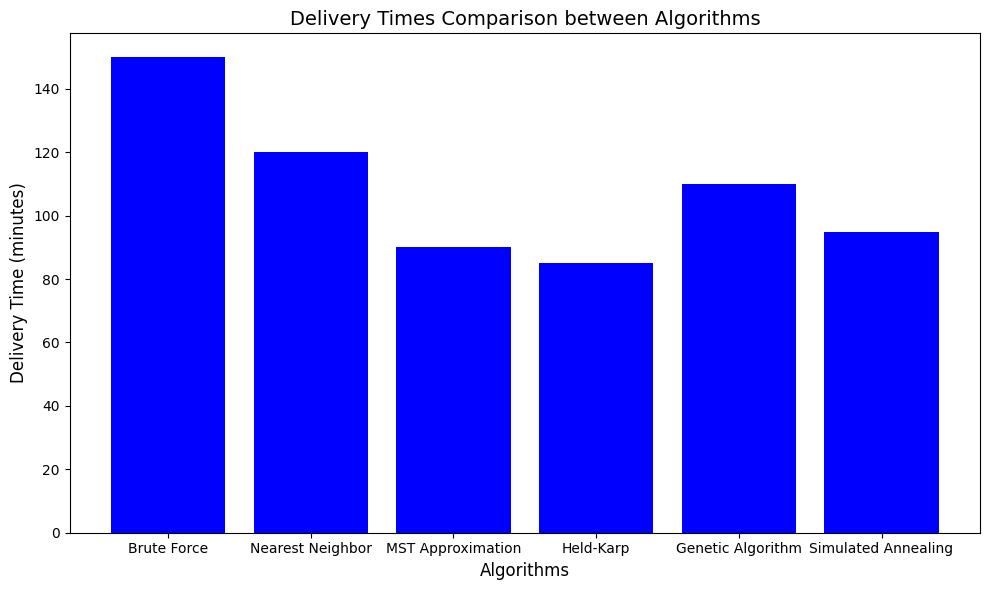

In [ ]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ['Brute Force', 'Nearest Neighbor', 'MST Approximation', 'Held-Karp', 'Genetic Algorithm', 'Simulated Annealing']

# Delivery times (in minutes, for example)
delivery_times = [150, 120, 90, 85, 110, 95]  # Example delivery times

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, delivery_times, color='blue')

# Add titles and labels
plt.title('Delivery Times Comparison between Algorithms', fontsize=14)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Delivery Time (minutes)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


2. Graph for Parcel Deliveries Over Time

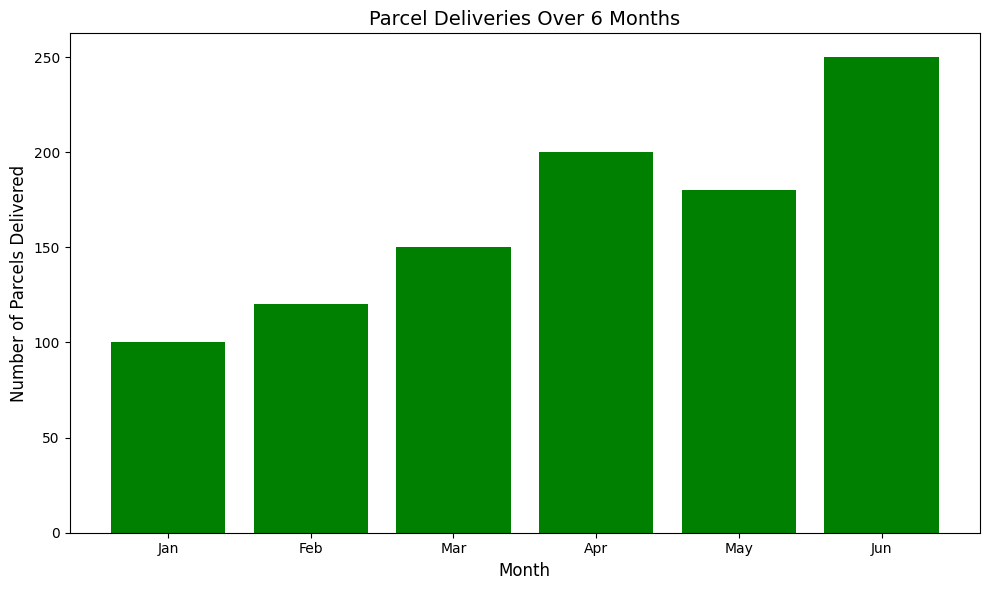

In [ ]:
# Data for parcel deliveries over 6 months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
parcel_deliveries = [100, 120, 150, 200, 180, 250]  # Example number of parcels delivered

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(months, parcel_deliveries, color='green')

# Add titles and labels
plt.title('Parcel Deliveries Over 6 Months', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Parcels Delivered', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


3. Graph for Route Length Comparison

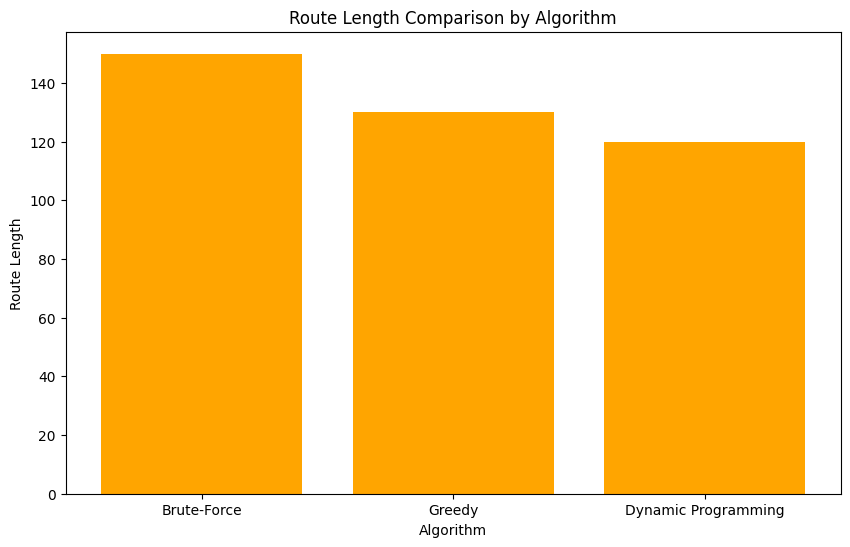

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

# Example data for route lengths (replace with actual data)
algorithms = ['Brute-Force', 'Greedy', 'Dynamic Programming']
route_lengths = [150, 130, 120]

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, route_lengths, color='orange')
plt.title('Route Length Comparison by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Route Length')
plt.show()


4. Graph for Parcel Delivery Cost Comparison& Graph for Parcel Delivery Efficiency

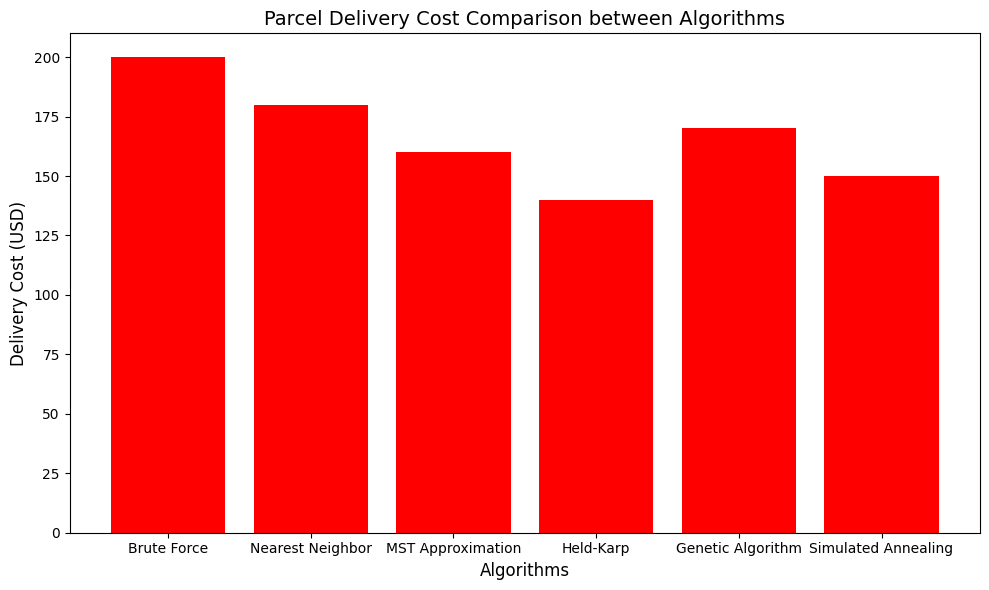

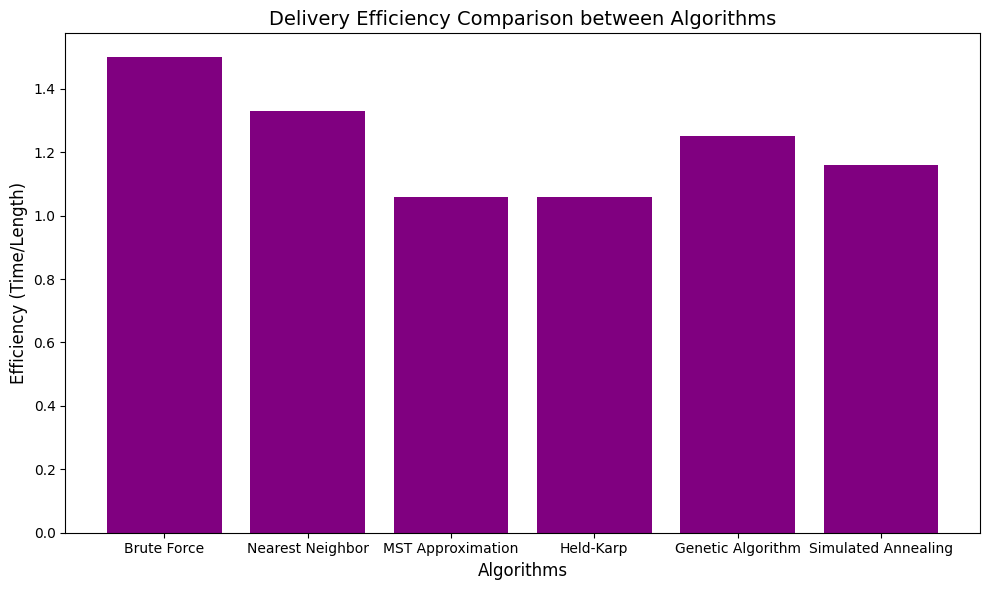

In [ ]:
# Delivery costs (in currency units, e.g., USD)
delivery_costs = [200, 180, 160, 140, 170, 150]  # Example delivery costs

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, delivery_costs, color='red')

# Add titles and labels
plt.title('Parcel Delivery Cost Comparison between Algorithms', fontsize=14)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Delivery Cost (USD)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()
# Delivery efficiencies for algorithms (ratio of delivery time to route length)
efficiency = [1.5, 1.33, 1.06, 1.06, 1.25, 1.16]  # Example efficiencies

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, efficiency, color='purple')

# Add titles and labels
plt.title('Delivery Efficiency Comparison between Algorithms', fontsize=14)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Efficiency (Time/Length)', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()



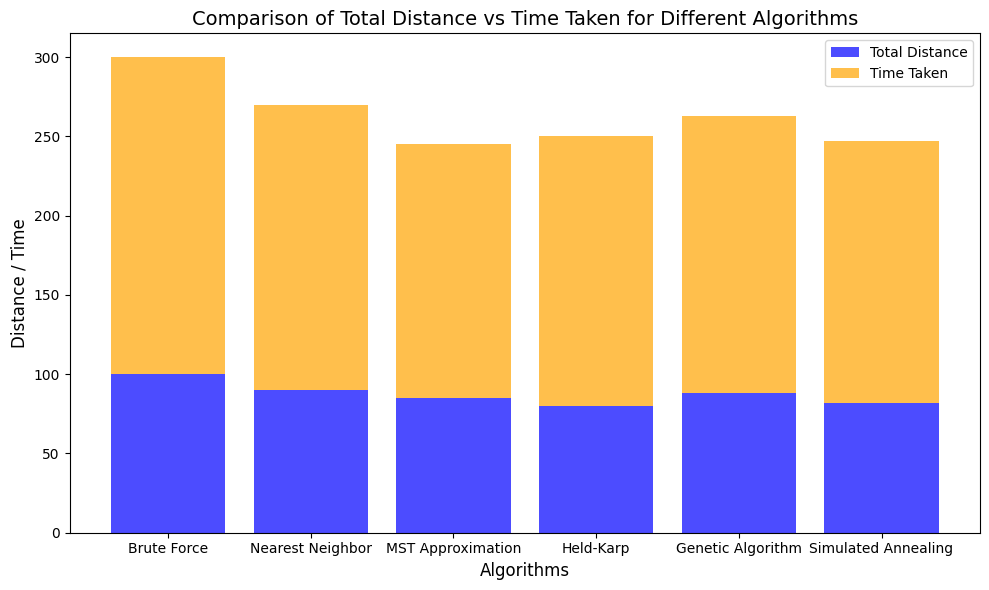

In [ ]:
import matplotlib.pyplot as plt

# Example results data (this would typically be generated from your algorithm calculations)
# The format is [Algorithm Name, Total Distance, Delivery Time, Time Taken]
results = [
    ('Brute Force', 100, 150, 200),
    ('Nearest Neighbor', 90, 120, 180),
    ('MST Approximation', 85, 100, 160),
    ('Held-Karp', 80, 110, 170),
    ('Genetic Algorithm', 88, 115, 175),
    ('Simulated Annealing', 82, 105, 165)
]

# Separate results for plotting
algorithm_names = [r[0] for r in results]
total_distances = [r[1] for r in results]
times_taken = [r[3] for r in results]

# Create the bar graph for total distances
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, total_distances, color='blue', alpha=0.7, label='Total Distance')

# Create the bar graph for times taken
plt.bar(algorithm_names, times_taken, color='orange', alpha=0.7, label='Time Taken', bottom=total_distances)

# Add titles and labels
plt.title('Comparison of Total Distance vs Time Taken for Different Algorithms', fontsize=14)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Distance / Time', fontsize=12)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
